# Customer Segmentation Analysis Part 1

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Q. What is Customer Segmentation and why is it important from a marketing perspective?

#### **Customer segmentation** is a way for an organisations/Business firm can more effectively target their customers by carefully matching their marketing strategy and methods to their needs. it is process of grouping your consumers according to common key characteristics like demographics or behaviours in order to market to them more successfully.

### **Importance of Customer Segmentation:**

*   It makes marketing and sales more successful. by customer segmentation, we will have a clearer grasp of the wants and needs of your clients.
*    Effective customer segmentation will help us to increase client lifetime value, which will have an even greater impact on our organisation.

* By more effectively targeting our customers and better knowing them, we can improve their loyalty. 


## Import Libraries and Data

In [2]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

## Check encoding in the dataset because if you load the dataset without encoding an error will occur

In [3]:
#!pip install import chardet

In [4]:
#import the chardet library and use the detect method to find the type of encoding
import chardet

In [5]:
#reading file in binary format as we are specifying rb in file open method.
with open("/content/drive/MyDrive/DAB_303/Sales_data.csv", 'rb') as file:
  print(chardet.detect(file.read()))


KeyboardInterrupt: ignored

In [56]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/DAB_303/Sales_data.csv', encoding= 'ISO-8859-1')
# encoding='latin-1'

## Data Exploration

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [58]:
data.shape

(541909, 8)

In [59]:
data.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

## Data Preprocessing

* Remove Null Values
* Remove Duplicate Values

In [60]:
# Take all the rows where customer ID not equal to blank
data= data[pd.notnull(data['CustomerID'])]

In [61]:
data.shape

(406829, 8)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [63]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [64]:
# Removing duplicates
filtered_data=data[['Country','CustomerID']].drop_duplicates()

In [65]:
filtered_data.shape

(4380, 2)

In [66]:
filtered_data.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


In [67]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4380 entries, 0 to 541768
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     4380 non-null   object 
 1   CustomerID  4380 non-null   float64
dtypes: float64(1), object(1)
memory usage: 102.7+ KB


## Data Insights

* Top 10 country customer data

In [68]:
# Check the country wise distribution
data.Country.value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [69]:
filtered_data.Country.value_counts()[:10]

United Kingdom    3950
Germany             95
France              87
Spain               31
Belgium             25
Switzerland         21
Portugal            19
Italy               15
Finland             12
Austria             11
Name: Country, dtype: int64

In [70]:
fcc = filtered_data.Country.value_counts()[:10]
fcc

United Kingdom    3950
Germany             95
France              87
Spain               31
Belgium             25
Switzerland         21
Portugal            19
Italy               15
Finland             12
Austria             11
Name: Country, dtype: int64

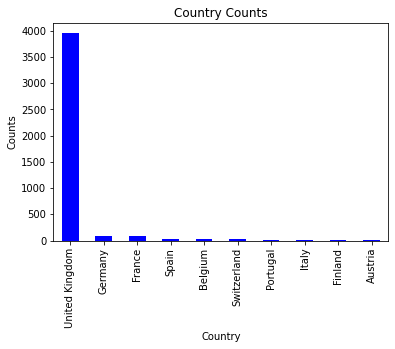

In [71]:
import matplotlib.pyplot as plt

fcc.plot.bar("Country","Count", color = "blue")
plt.xlabel("Country")
plt.ylabel("Counts")
plt.title("Country Counts")
plt.show()

## Q. What do you observe?
Here, we can see UK has the most number of records for customer, which are almost 3950, and this column chart shows top 10 countrywise customer data from our data. 

In [72]:
# Filter data by the top most country
uk_data=data[data.Country=='United Kingdom']

In [73]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


## Q. What do you observe? Which column needs special attention?

From the above data discrition, we can say there is something wrong with **Quantity and UnitPrice**. as **Quantity** contains the min value which is -80995 and max value which is 80995. In other words we can say customers purchased 80995 items and all were returned may be. so it showing negative value. while for the **UnitPrice** the min value is zero, which is illogical as it can indicates that some items were sold for free.

In [74]:

uk_data = uk_data[(uk_data['Quantity'] > 0)]

In [75]:

uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354345 non-null  object 
 1   StockCode    354345 non-null  object 
 2   Description  354345 non-null  object 
 3   Quantity     354345 non-null  int64  
 4   InvoiceDate  354345 non-null  object 
 5   UnitPrice    354345 non-null  float64
 6   CustomerID   354345 non-null  float64
 7   Country      354345 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB


In [76]:
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [77]:
# Filter the required columns only
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [78]:
# Calculate Total Price (Quantity) * Unit Price
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

## Time frame of data

In [79]:
# Check Min and Max dates
print(uk_data['InvoiceDate'].min())
print(uk_data['InvoiceDate'].max())

1/10/2011 10:32
9/9/2011 9:52


## Q. Comment on the above results.

### here we are firstly getting only those data which hase quantity greater than 0, and then we calculated total price by unit price and how much they bought. time frame data output shows that in UK first order was made on 10th January, 2011. and the last order was made on 9th September, 2011.

## Perform RFM Analysis

* For Recency, Calculate the number of days between present date and date of last purchase for each customer.

* For Frequency, Calculate the number of orders for each customer.

* For Monetary, Calculate sum of purchase price for each customer

In [80]:
# Store a date as a reference point for recency calculations
PRESENT = dt.datetime(2011, 12, 10)

# Convert date to datetime format
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [81]:
# Check Min and Max dates
print(uk_data['InvoiceDate'].min())
print(uk_data['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:49:00


In [82]:
uk_data['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [83]:
uk_data['InvoiceNo'].value_counts().head()

576339    542
579196    533
580727    529
578270    442
573576    435
Name: InvoiceNo, dtype: int64

## Q. Comment on the above results

### here firstly, we set the reference date for getting recency test. in above results First feature is InvoiceNo, which is Invoice number and those are all unique top 5 invoiceNo. and next feature is count of those invoiceNo.

In [84]:
orders = uk_data.groupby(['InvoiceNo', 'InvoiceDate', 'CustomerID']).agg({'TotalPrice': lambda x: x.sum()}).reset_index()
orders.head()

,InvoiceNo,InvoiceDate,CustomerID,TotalPrice
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [85]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [86]:
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [87]:
# Rename the columns 
rfm.columns=['monetary','frequency','recency']

In [88]:
rfm['recency'] = rfm['recency'].astype(int)

In [89]:

rfm['monetary'] = rfm['monetary'].astype(int)

In [90]:
rfm.head()

,monetary,frequency,recency
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4596,33719
12749.0,3,199,4090
12820.0,3,59,942


### Q. What is wrong with this table think ??

### A. we can see that, there is something wrong with the column headers of the RFM dataset.The columns should be in order of recency, frequency and Monetory, as first column was originaly InvoiceDate. and the third column was originaly TotalPrice.

In [91]:
# Change the column names
rfm.columns=['recency','frequency','monetary']

In [92]:
rfm.head(10)

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4596,33719
12749.0,3,199,4090
12820.0,3,59,942
12821.0,214,6,92
12822.0,70,46,948
12823.0,74,5,1759
12824.0,59,25,397


## Create Visuals

* Histogram for Recency Data
* Histogram for Frequency Data
* Histogram for Monetary Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa325ed9e90>]],
      dtype=object)

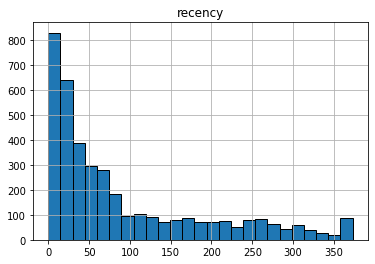

In [93]:
# Histogram for Recency Data (UK)
rfm.hist(column='recency',edgecolor='black', bins=25)

### Q. What does this above chart tell ?

Here, we can see that our histogram based on the recency is biased towards the left side and its distribution is a right-skewed and also we can see that the plot is crowded between 0 and 400. now, Based on that we can tell that the past 400 days have seen a lot of customer activity.

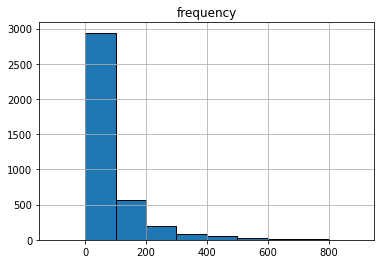

In [94]:
# Histogram for Frequency Data (UK)

hist_bin_width = 100
rfm.hist(column='frequency', edgecolor='black', bins=range(-100, 1000, hist_bin_width))
plt.show()

### Q. What does this above chart tell ?

In this plot, we can see that the majority of customers do not buy more than 200 times.

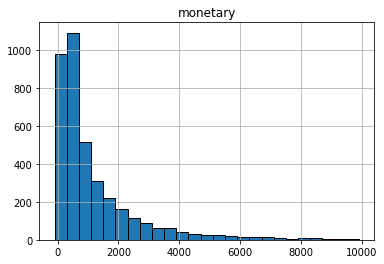

In [95]:
# Histogram for Monetary Data (UK)


hist_bin_width = 400
rfm.hist(column='monetary', edgecolor='black', bins=range(-100, 10000, hist_bin_width))
plt.show()


In [96]:
rfm.sort_values(by=['monetary'], inplace=True)

rfm = rfm[rfm.monetary <10000]

rfm.tail(100)

,recency,frequency,monetary
CustomerID,,,
14049.0,16,488,5681
14110.0,3,156,5683
13468.0,1,302,5704
16553.0,163,84,5719
13178.0,26,265,5725
...,...,...,...
14733.0,16,202,9585
13458.0,7,382,9646
15078.0,7,440,9743


## Histogram for Monetary Data (UK)

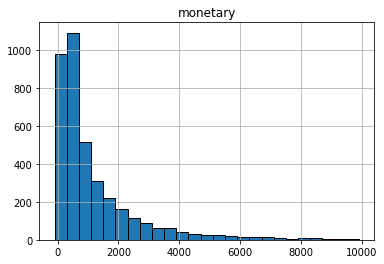

In [97]:
hist_bin_width = 400
rfm.hist(column='monetary', edgecolor='black', bins=range(-100, 10000, hist_bin_width))
plt.show()


## Q. What does this above chart tell ?
here, we can see that most of customers not spend more than $3,000. while there is very few those spend some.

In [98]:
# Save the cleaned file
rfm.to_csv('rfm.csv')

### **Calcualte the RFM Score**


In [99]:
# Use quintiles to to make 5 equal parts based on the available values. Each quintiles contains 20% of the population. 
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 15.0, 0.4: 33.0, 0.6: 72.0, 0.8: 182.0},
 'frequency': {0.2: 13.0, 0.4: 28.0, 0.6: 55.0, 0.8: 115.0},
 'monetary': {0.2: 236.0, 0.4: 450.0, 0.6: 854.0, 0.8: 1822.0}}

In [1]:
# Define functions to assign ranks from 1 to 5. 
# A lower Recency value is better and higher Frequency and Monetary values are better. 
# We will have to write two separate functions

def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

In [103]:
# Calculate RFM score for each customer
pd.options.mode.chained_assignment = None  # default='warn'

rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [104]:
# Combine the scores
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score
CustomerID,,,,,,,
13256.0,14,1,0,5,1,1,511
16738.0,297,1,3,1,1,1,111
16454.0,44,2,6,3,1,1,311
14792.0,63,2,6,3,1,1,311
17956.0,249,1,12,1,1,1,111


In [105]:
# Create the customer segments based on your knowledge. 
# Create 6 segments based on R and F scores

segments = {
    '[1-2][1-4]': 'at risk',
    '[1-2]5': 'can\'t loose',
    '3[1-3]': 'needs attention',
    '[3-4][4-5]': 'loyal customers',
    '[4-5]1': 'new customers',
    '[4-5][2-5]': 'champions'
    
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segments, regex=True)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13256.0,14,1,0,5,1,1,511,new customers
16738.0,297,1,3,1,1,1,111,at risk
16454.0,44,2,6,3,1,1,311,needs attention
14792.0,63,2,6,3,1,1,311,needs attention
17956.0,249,1,12,1,1,1,111,at risk


In [106]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

segments_counts

can't loose          77
new customers       147
needs attention     477
loyal customers     695
champions           989
at risk            1451
Name: Segment, dtype: int64

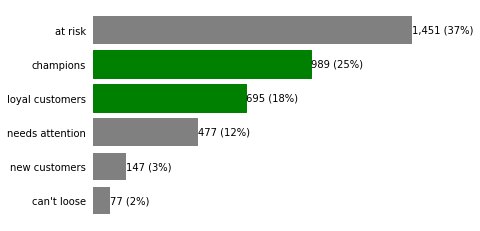

In [107]:
# Distribution of Segments
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='gray')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('green')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

### Q. Comment on the above chart
### Q. Who are the best customers?

In [108]:
rfm[rfm['RFM Score']=='555'].sort_values('monetary', ascending=False).head()


,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13001.0,4,339,9818,5,5,5,555,champions
13199.0,3,119,9817,5,5,5,555,champions
15078.0,7,440,9743,5,5,5,555,champions
13458.0,7,382,9646,5,5,5,555,champions
16523.0,1,290,9418,5,5,5,555,champions


### Q. Which customers are likely to churn?

In [ ]:
#Customers who's recency value is low
rfm[rfm['R'] <= 1 ].sort_values('monetary', ascending=False).head()

### Q. Which customers we are going to loose?

In [ ]:
#Customers who's recency, frequency and monetary values are low 
rfm[rfm['RFM Score']=='111'].sort_values('recency',ascending=False).head()

### Q. Who are the loyal customers?

In [109]:
#Customers with high frequency value

In [110]:
rfm[rfm['F'] >= 3 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13001.0,4,339,9818,5,5,5,555,champions
13199.0,3,119,9817,5,5,5,555,champions
15078.0,7,440,9743,5,5,5,555,champions
13458.0,7,382,9646,5,5,5,555,champions
14733.0,16,202,9585,4,5,5,455,loyal customers


### Calculate RFM scores using 4 quartiles and answer all the questions again Make sure you give proper names to the segments. Please create 4 segments based on R and F scores instead of 6